# Determine t80% from local HDX-MS analysis

In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import matplotlib as mpl

In [2]:
time = np.array([30,20,15,10,5,2.5,1,0.667,0.5,0.33,0.167,0.083,0.01]) #13 timepoints

In [3]:
data_table = np.genfromtxt('PpiB_4C_data.txt').T
data_table.shape

(14, 160)

In [4]:
data_total = [np.stack([data_table[0], data_table[(i)]]) for i in np.arange(13) + 1]
data_out = []
for d in data_total:
    x, y = d
    
    data_out.append([x, y])

f_data = np.array(data_out)[::-1]
f_data.shape


(13, 2, 160)

In [5]:
X=f_data[:,0,:].flatten()
X.shape

(2080,)

In [6]:
Z=f_data[:,1,:]
Z.shape

(13, 160)

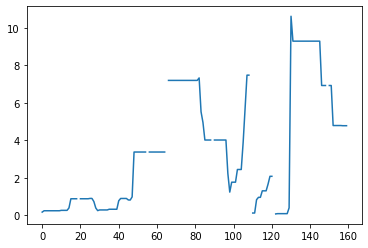

In [7]:
#Define time when folded fractions reach 0.8 using interpolation
list_t= []
for column in Z.T:
    i=np.interp(0.8,column[::-1], time[::-1])
    list_t.append(i)
array_t= np.array(list_t)

#Prolines and residues without coverage are removed
array_t[array_t == 30.0] = np.nan
np.savetxt('t80_PpiB_4C.txt', array_t)
plt.plot(array_t)